In [1]:
aws = False  #if it is working over AWS 
import matplotlib
if aws:
    matplotlib.use('Pdf')
    user = 'ubuntu'
else:
    user = 'payam'
import numpy as np
from pylab import *
%matplotlib inline
import tempfile
caffe_root = '/home/{0}/workspace/caffe/'.format(user)
dataset_root = '/home/{0}/dataset/stanford_mobile_images/'.format(user)
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe
if aws:
    caffe.set_device(0) #if run on g2.8xlarge turn 0  to all
    caffe.set_mode_gpu()
else:
    caffe.set_mode_cpu()


### Load Data

In [10]:
#load images
import os
path1 = dataset_root + 'cd_covers/Reference/031.jpg'
path2 = dataset_root + 'cd_covers/Canon/031.jpg'
image1 = caffe.io.load_image(path1)  #500 * 500
image2 = caffe.io.load_image(path2) #2736 * 3648

#load networks
model_name = 'bvlc_reference_caffenet'
model_prototxt = "{0}models/{1}/deploy.prototxt".format(caffe_root, model_name)
model_trained = "{0}models/{1}/{1}.caffemodel".format(caffe_root, model_name)

In [23]:
image1.shape

(500, 500, 3)

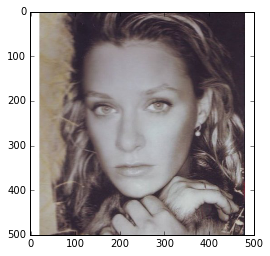

In [34]:
plt.imshow(image1)

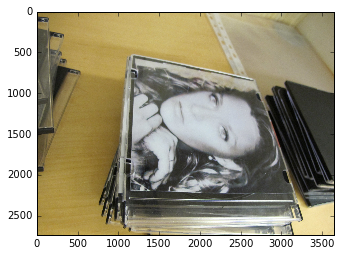

In [35]:
plt.imshow(image2)

### Load Network

In [11]:
net = caffe.Classifier(model_prototxt, model_trained,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

In [12]:
print net.blobs['data'].data.shape

(10, 3, 227, 227)


In [13]:
# for each layer, show the output shape
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(10, 3, 227, 227)
conv1	(10, 96, 55, 55)
pool1	(10, 96, 27, 27)
norm1	(10, 96, 27, 27)
conv2	(10, 256, 27, 27)
pool2	(10, 256, 13, 13)
norm2	(10, 256, 13, 13)
conv3	(10, 384, 13, 13)
conv4	(10, 384, 13, 13)
conv5	(10, 256, 13, 13)
pool5	(10, 256, 6, 6)
fc6	(10, 4096)
fc7	(10, 4096)
fc8	(10, 1000)
prob	(10, 1000)


### Prediction

In [41]:
# Helper function for deprocessing preprocessed images, e.g., for display.
def deprocess_net_image(image):
    image = image.copy()              # don't modify destructively
    image = image[::-1]               # BGR -> RGB
    image = image.transpose(1, 2, 0)  # CHW -> HWC
    #image += [123, 117, 104]          # (approximately) undo mean subtraction

    # clamp values in [0, 255]
    image[image < 0], image[image > 255] = 0, 255

    # round and cast from float32 to uint8
    image = np.round(image)
    image = np.require(image, dtype=np.uint8)

    return image

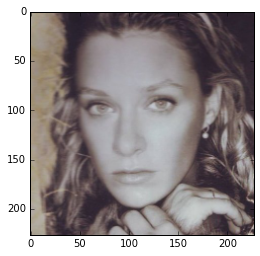

In [42]:
prd = net.predict([image1], oversample=False)
img1 = net.blobs['data'].data[0]
plt.imshow(deprocess_net_image(img1))

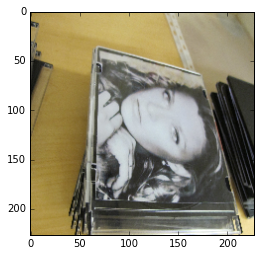

In [43]:
prd = net.predict([image2], oversample=False)
img2 = net.blobs['data'].data[0]
plt.imshow(deprocess_net_image(img2))

#### It seems every thing is working fine, and I would not have any problem with input layer. 